## Boulder Watershed Demo

Process ATL03 data from the Boulder Watershed region and produce a customized ATL06 elevation dataset.

### What is demonstrated

* The `icesat2.atl06p` API is used to perform a SlideRule parallel processing request of the Boulder Watershed region
* The `matplotlib` and `geopandas` packages are used to plot the data returned by SlideRule

### Points of interest

This is a simple notebook showing how a region of interest can be processed by SlideRule and the results analyzed using pandas DataFrames and Matplotlib.

In [22]:
import logging
import geodatasets
import geopandas as gpd
import matplotlib.pyplot as plt
from sliderule import icesat2, sliderule

## SlideRule Configuration

In [23]:
# Configure ICESat-2 API
icesat2.init("slideruleearth.io")
# Configure Region of Interest
# region = [ {"lon":-105.82971551223244, "lat": 39.81983728534918},
#            {"lon":-105.30742121965137, "lat": 39.81983728534918},
#            {"lon":-105.30742121965137, "lat": 40.164048017973755},
#            {"lon":-105.82971551223244, "lat": 40.164048017973755},
#            {"lon":-105.82971551223244, "lat": 39.81983728534918} ]

# Specify region of interest from geojson
poly_fn = '/Users/titus/BSU/remote_sensing/tutorials/icesat2/karina/RCEW-outline_WGS84.geojson'
region = sliderule.toregion(poly_fn)["poly"] # symplify 
region

[{'lon': -116.799, 'lat': 43.06089},
 {'lon': -116.7954, 'lat': 43.06089},
 {'lon': -116.7481, 'lat': 43.06268},
 {'lon': -116.747, 'lat': 43.06295},
 {'lon': -116.7411, 'lat': 43.06456},
 {'lon': -116.7409, 'lat': 43.06469},
 {'lon': -116.7392, 'lat': 43.06591},
 {'lon': -116.7379, 'lat': 43.06712},
 {'lon': -116.7179, 'lat': 43.09706},
 {'lon': -116.7008, 'lat': 43.12889},
 {'lon': -116.6963, 'lat': 43.13834},
 {'lon': -116.696, 'lat': 43.13915},
 {'lon': -116.6922, 'lat': 43.15454},
 {'lon': -116.6881, 'lat': 43.22341},
 {'lon': -116.6881, 'lat': 43.22476},
 {'lon': -116.6947, 'lat': 43.24693},
 {'lon': -116.6954, 'lat': 43.24828},
 {'lon': -116.6958, 'lat': 43.24883},
 {'lon': -116.702, 'lat': 43.2564},
 {'lon': -116.7022, 'lat': 43.25654},
 {'lon': -116.7579, 'lat': 43.2872},
 {'lon': -116.7605, 'lat': 43.28828},
 {'lon': -116.7612, 'lat': 43.28856},
 {'lon': -116.8199, 'lat': 43.31163},
 {'lon': -116.8251, 'lat': 43.31298},
 {'lon': -116.8266, 'lat': 43.31218},
 {'lon': -116.8303

## Execute ATL06 Algorithm using SlideRule

In [24]:
%%time

# Build ATL06 Request
parms = {
    "poly": region,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 10.0,
    "cnt": 10,
    "len": 40.0,
    "res": 20.0
}

# Request ATL06 Data
gdf = icesat2.atl06p(parms)

# Display Statistics
print("Reference Ground Tracks: {}".format(gdf["rgt"].unique()))
print("Cycles: {}".format(gdf["cycle"].unique()))
print("Received {} elevations".format(len(gdf)))

Reference Ground Tracks: [ 905  501  943  463 1347 1385   59]
Cycles: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Received 188565 elevations
CPU times: user 5.38 s, sys: 302 ms, total: 5.68 s
Wall time: 33.3 s


## Plot Region

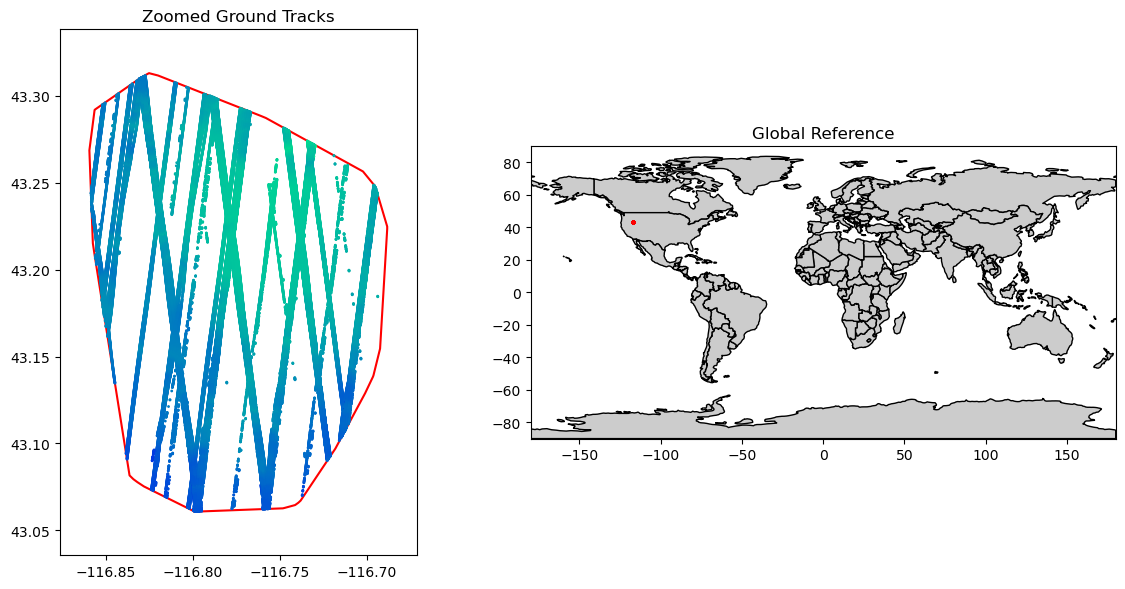

In [26]:
# Calculate Extent
lons = [p["lon"] for p in region]
lats = [p["lat"] for p in region]
lon_margin = (max(lons) - min(lons)) * 0.1
lat_margin = (max(lats) - min(lats)) * 0.1

# Create Plot
fig,(ax1,ax2) = plt.subplots(num=None, ncols=2, figsize=(12, 6))
box_lon = [e["lon"] for e in region]
box_lat = [e["lat"] for e in region]

# Plot SlideRule Ground Tracks
ax1.set_title("Zoomed Ground Tracks")
gdf.plot(ax=ax1, column=gdf["h_mean"], cmap='winter_r', s=1.0, zorder=3)
ax1.plot(box_lon, box_lat, linewidth=1.5, color='r', zorder=2)
ax1.set_xlim(min(lons) - lon_margin, max(lons) + lon_margin)
ax1.set_ylim(min(lats) - lat_margin, max(lats) + lat_margin)
ax1.set_aspect('equal', adjustable='box')

# Plot SlideRule Global View
ax2.set_title("Global Reference")
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
# Load the naturalearth_lowres dataset
# world = gpd.read_file(geodatasets.get_path("naturalearth_lowres"))
world.plot(ax=ax2, color='0.8', edgecolor='black')
gdf.plot(ax=ax2, marker='o', color='red', markersize=2.5, zorder=3)
ax2.set_xlim(-180,180)
ax2.set_ylim(-90,90)
ax2.set_aspect('equal', adjustable='box')

# Show Plot
plt.tight_layout()